In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#load the data
data_1 = pd.read_csv("data/bank-additional-full.csv") 

In [3]:
# load the data
data_2 = pd.read_csv("data/bank-additional.csv")

In [4]:
#load the data
data_3= pd.read_csv("data/bank-full.csv")

In [5]:
#load the data
data_4= pd.read_csv("data/bank.csv")

In [6]:
#check the head of the data
data_1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#check the head
data_2.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
#check the head
data_3.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
#check the head
data_4.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
#check the info of the data 
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
#check the info of the head
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [12]:
#check the info of the data
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
#Check the info of the data
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
#decribe the data
data_1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
#describe the data
data_2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
#describe the data
data_3.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
#describe the data
data_4.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### merging all the dataset 

In [18]:
merged_bank = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True)


In [19]:
merged_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95039 entries, 0 to 95038
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             95039 non-null  int64  
 1   job             95039 non-null  object 
 2   marital         95039 non-null  object 
 3   education       95039 non-null  object 
 4   default         95039 non-null  object 
 5   housing         95039 non-null  object 
 6   loan            95039 non-null  object 
 7   contact         95039 non-null  object 
 8   month           95039 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        95039 non-null  int64  
 11  campaign        95039 non-null  int64  
 12  pdays           95039 non-null  int64  
 13  previous        95039 non-null  int64  
 14  poutcome        95039 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

In [20]:
merged_bank.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week       49732
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      49732
cons.price.idx    49732
cons.conf.idx     49732
euribor3m         49732
nr.employed       49732
y                     0
balance           45307
day               45307
dtype: int64

In [21]:
# Fill missing values in 'day_of_week' with the mode
merged_bank['day_of_week'] = merged_bank['day_of_week'].fillna(merged_bank['day_of_week'].mode()[0])


In [22]:
# Fill economic indicators with their mean
columns_to_fill = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
merged_bank[columns_to_fill] = merged_bank[columns_to_fill].fillna(merged_bank[columns_to_fill].mean())


In [23]:
# Fill 'balance' with the median
merged_bank['balance'] = merged_bank['balance'].fillna(merged_bank['balance'].median())


In [24]:
# Fill 'day' with the median
merged_bank['day'] = merged_bank['day'].fillna(merged_bank['day'].median())


In [25]:
merged_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
balance           0
day               0
dtype: int64

In [26]:
# Check for duplicate rows
duplicates = merged_bank.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 8652


## EDA

In [27]:
merged_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95039 entries, 0 to 95038
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             95039 non-null  int64  
 1   job             95039 non-null  object 
 2   marital         95039 non-null  object 
 3   education       95039 non-null  object 
 4   default         95039 non-null  object 
 5   housing         95039 non-null  object 
 6   loan            95039 non-null  object 
 7   contact         95039 non-null  object 
 8   month           95039 non-null  object 
 9   day_of_week     95039 non-null  object 
 10  duration        95039 non-null  int64  
 11  campaign        95039 non-null  int64  
 12  pdays           95039 non-null  int64  
 13  previous        95039 non-null  int64  
 14  poutcome        95039 non-null  object 
 15  emp.var.rate    95039 non-null  float64
 16  cons.price.idx  95039 non-null  float64
 17  cons.conf.idx   95039 non-null 

### Univariate Analysis Questions
1. What is the distribution of customer age?

2. What is the frequency distribution of job roles?
3. Which job role is most common among customers?
4. How many customers have defaulted on previous credit? (default)
5. What is the distribution of housing loan ownership? (housing)


#### 1. What is the distribution of customer age?

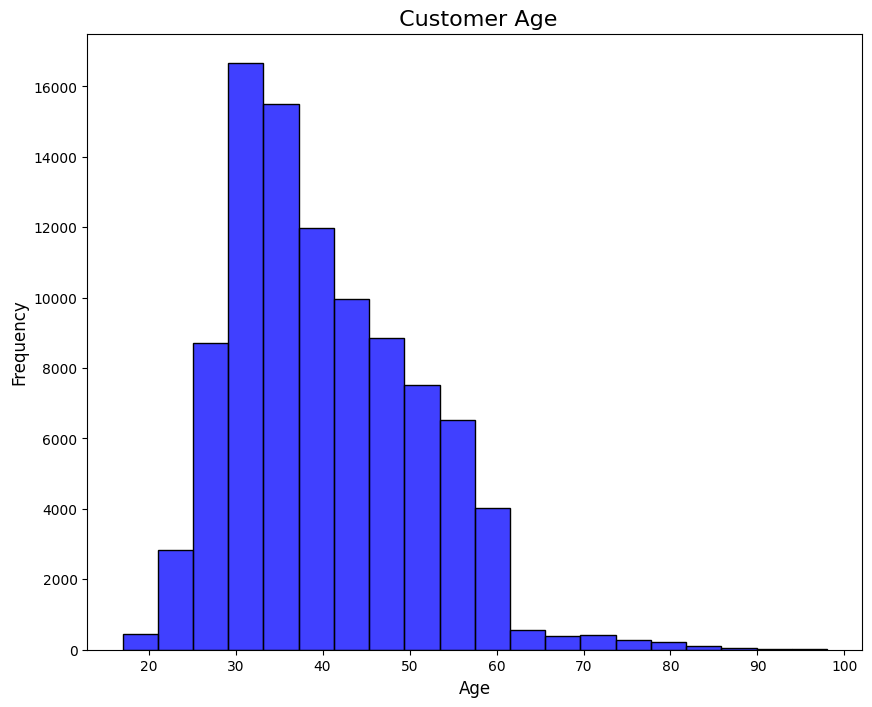

In [28]:
# Set a larger figure size for better visualization
plt.figure(figsize=(10, 8))

# Create a histogram with Seaborn
sns.histplot(merged_bank['age'], bins=20,  color='blue')

# Add labels and title
plt.title(' Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

#### 2. What is the frequency distribution of job roles?

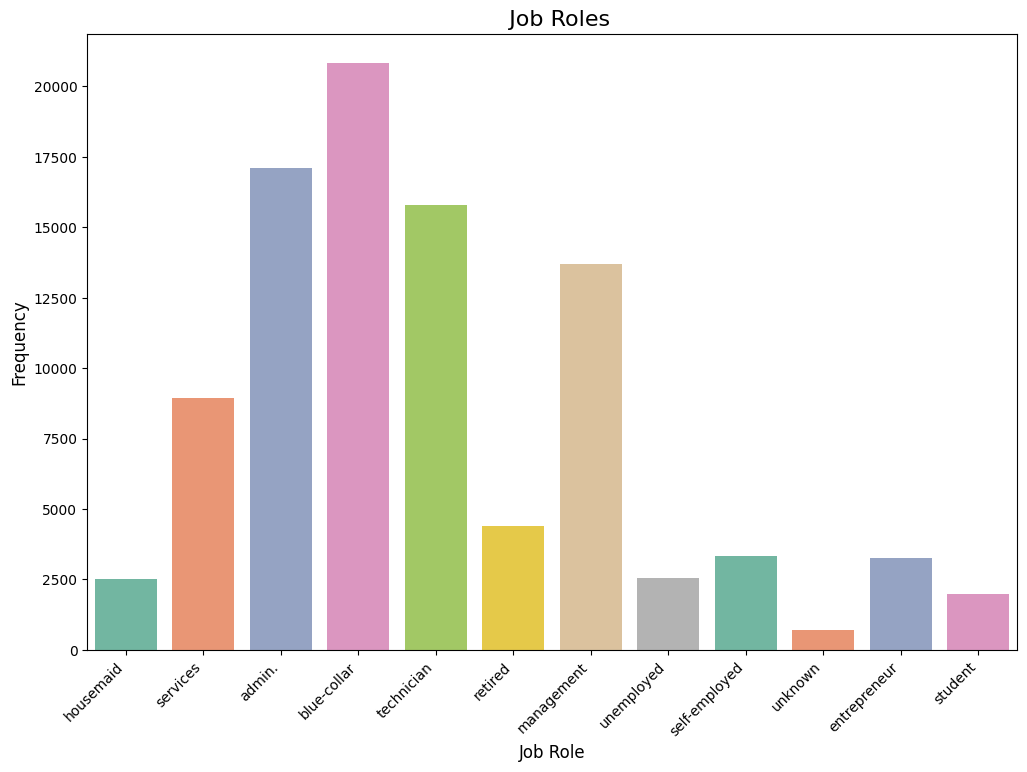

In [29]:
# Set a larger figure size for better visualization
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
sns.countplot(data=merged_bank, x='job', palette='Set2')

#  labels and title
plt.title('  Job Roles', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

#### 3. Which job role is most common among customers?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The most common job role is 'blue-collar' with 20816 customers.


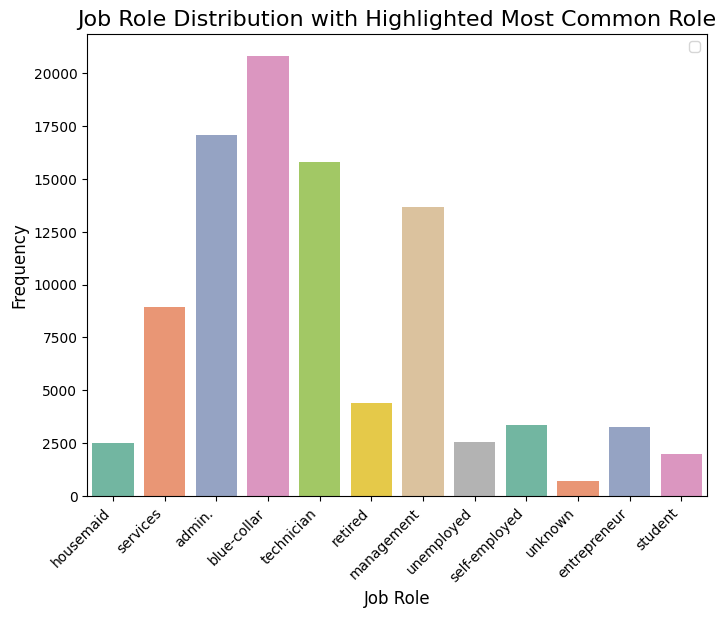

In [30]:
# the most common job role
most_common_job = merged_bank['job'].mode()[0]
most_common_count = merged_bank['job'].value_counts().iloc[0]

#  the most common job role and its count
print(f"The most common job role is '{most_common_job}' with {most_common_count} customers.")

# Set a larger figure size for better visualization
plt.figure(figsize=(8, 6))

# Create a bar plot of the job roles
sns.countplot(data=merged_bank, x='job', palette='Set2')

# Highlight the most common job role
#plt.axvline(x=merged_bank['job'].value_counts().index.get_loc(most_common_job), color='red', linestyle='--', label=f'Most Common: {most_common_job}')

# Add labels and title
plt.title('Job Role Distribution with Highlighted Most Common Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


plt.legend()

# Display the plot
plt.show()

#### 4. How many customers have defaulted on previous credit? (default)


In [31]:
merged_bank.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

['no' 'yes']


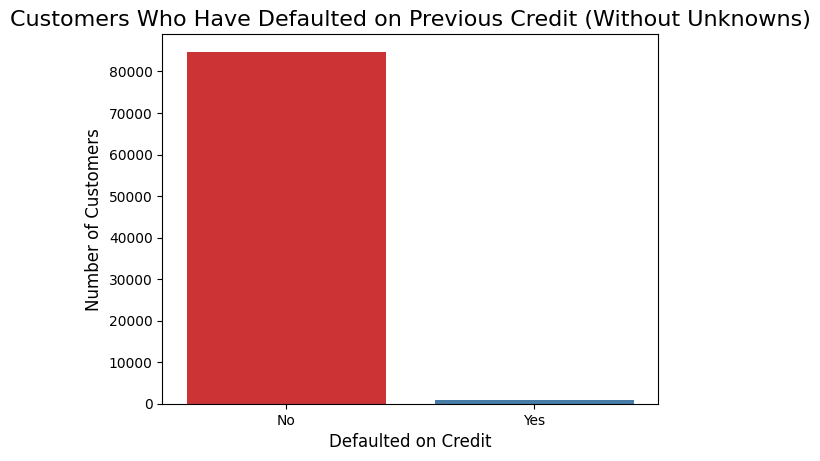

In [32]:

# Drop rows where 'default' is 'unknown'
merged_bank = merged_bank[merged_bank['default'] != 'unknown']

# Check the unique values in the 'default' column to confirm
print(merged_bank['default'].unique())

#  plot the distribution again to verify the cleaned data
sns.countplot(data=merged_bank, x='default', palette='Set1')
plt.title('Customers Who Have Defaulted on Previous Credit (Without Unknowns)', fontsize=16)
plt.xlabel('Defaulted on Credit', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### 5. What is the distribution of housing loan ownership? (housing)


In [33]:
merged_bank.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

['no' 'yes']


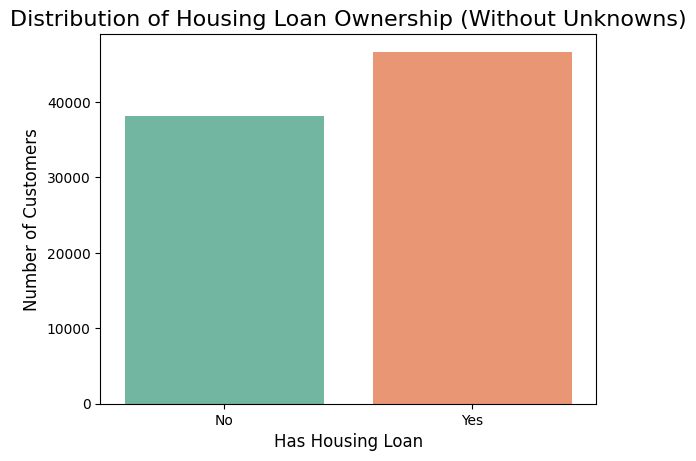

In [34]:

# Drop rows where 'housing' is 'unknown'
merged_bank = merged_bank[merged_bank['housing'] != 'unknown']

# Check the unique values in the 'housing' column to confirm
print(merged_bank['housing'].unique())

# Optionally, plot the distribution again to verify the cleaned data
sns.countplot(data=merged_bank, x='housing', palette='Set2')
plt.title('Distribution of Housing Loan Ownership (Without Unknowns)', fontsize=16)
plt.xlabel('Has Housing Loan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### Bivariate Analysis Questions
1. What is the relationship between age and campaign success?
Are younger or older customers more likely to respond positively (y)?
2. Does marital status (marital) affect the likelihood of a positive response (y)?
3. How does education level influence housing loan ownership (housing) or personal loan ownership (loan)?

4. How does the duration of the contact (duration) correlate with a positive outcome (y)?


#### 1. What is the relationship between age and campaign success?
#### Are younger or older customers more likely to respond positively (y)?

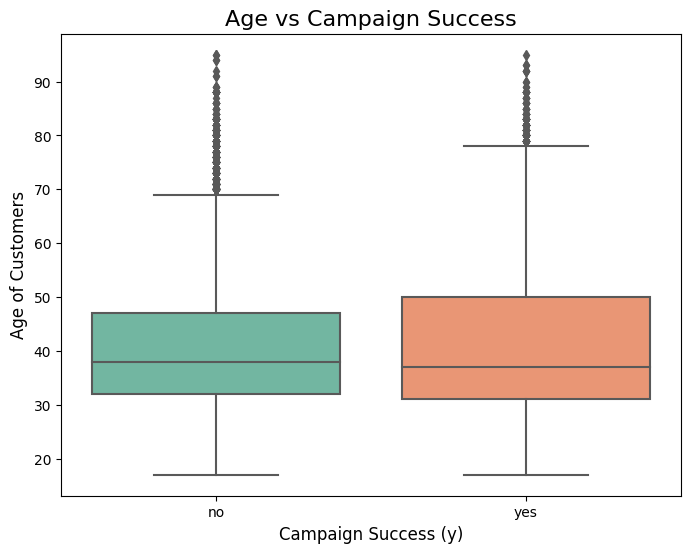

In [35]:
# Set a larger figure size for better visualization
plt.figure(figsize=(8, 6))

# Create a box plot for 'age' based on campaign response ('y')
sns.boxplot(x='y', y='age', data=merged_bank, palette='Set2')

# Add labels and title
plt.title('Age vs Campaign Success', fontsize=16)
plt.xlabel('Campaign Success (y)', fontsize=12)
plt.ylabel('Age of Customers', fontsize=12)

# Display the plot
plt.show()

#### 2. Does marital status (marital) affect the likelihood of a positive response (y)?



In [36]:
merged_bank.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

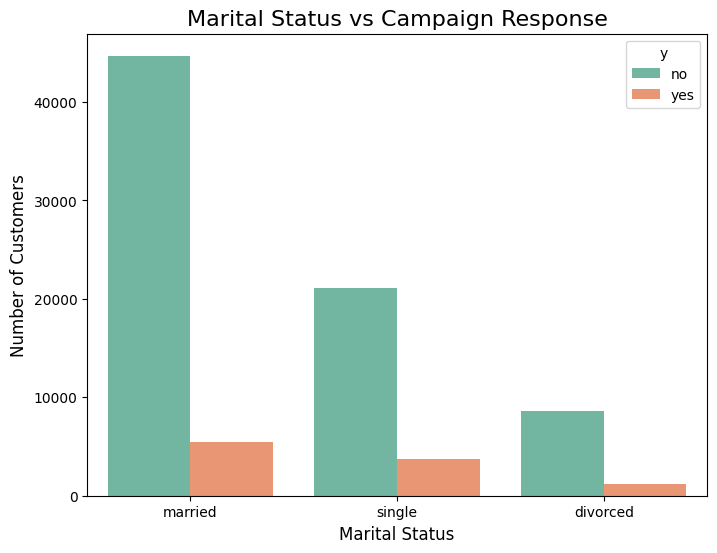

In [37]:
merged_bank = merged_bank[merged_bank['marital'] != 'unknown']
plt.figure(figsize=(8, 6))

# Create a count plot for marital status vs campaign response
sns.countplot(x='marital', hue='y', data=merged_bank, palette='Set2')

# Add labels and title
plt.title('Marital Status vs Campaign Response', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.show()

#### 3. How does education level influence housing loan ownership (housing) or personal loan ownership (loan)?


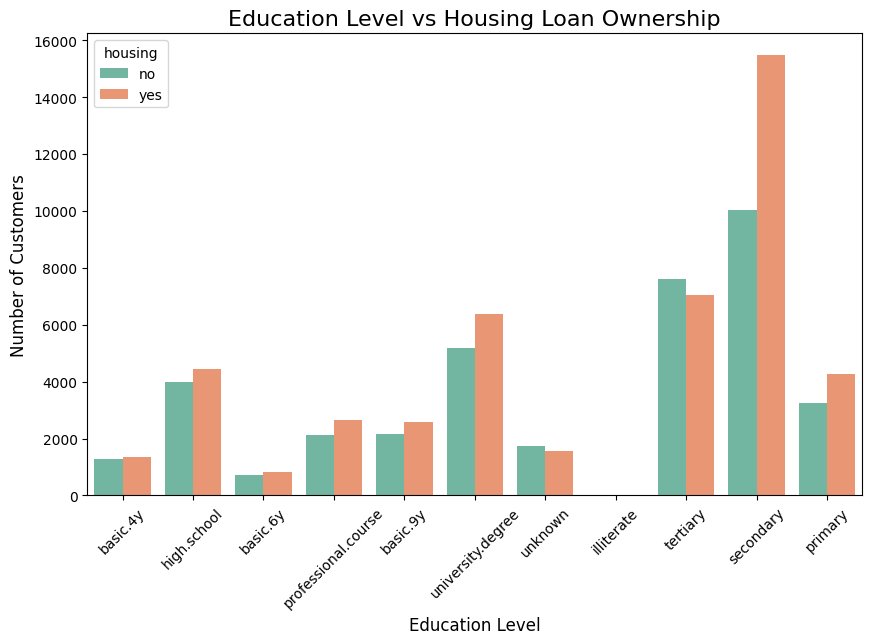

In [38]:
merged_bank= merged_bank[merged_bank['housing'] != 'unknown']
plt.figure(figsize=(10, 6))

# Create a stacked bar plot for housing loan ownership by education level
sns.countplot(x='education', hue='housing', data=merged_bank, palette='Set2')

# Add labels and title
plt.title('Education Level vs Housing Loan Ownership', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

#### 4. How does the duration of the contact (duration) correlate with a positive outcome (y)?

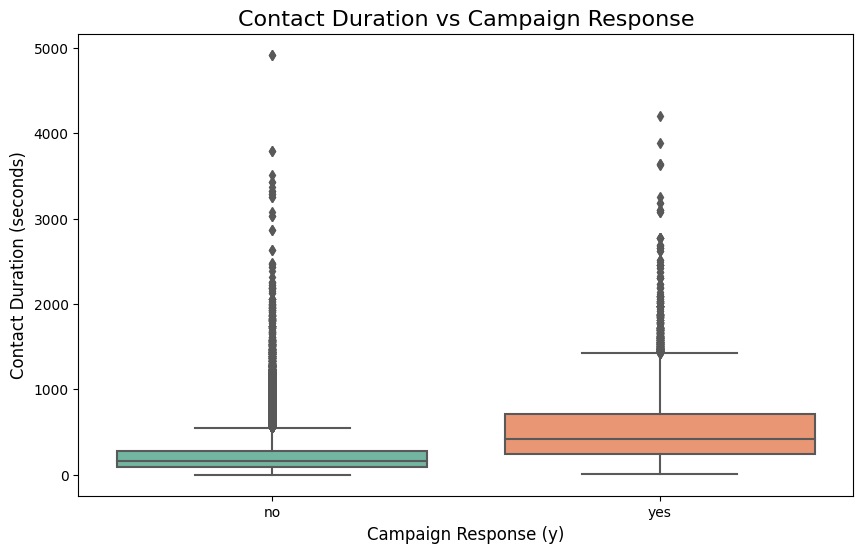

In [39]:
plt.figure(figsize=(10, 6))

# Create a box plot for contact duration vs campaign response
sns.boxplot(x='y', y='duration', data=merged_bank, palette='Set2')

# Add labels and title
plt.title('Contact Duration vs Campaign Response', fontsize=16)
plt.xlabel('Campaign Response (y)', fontsize=12)
plt.ylabel('Contact Duration (seconds)', fontsize=12)

# Display the plot
plt.show()

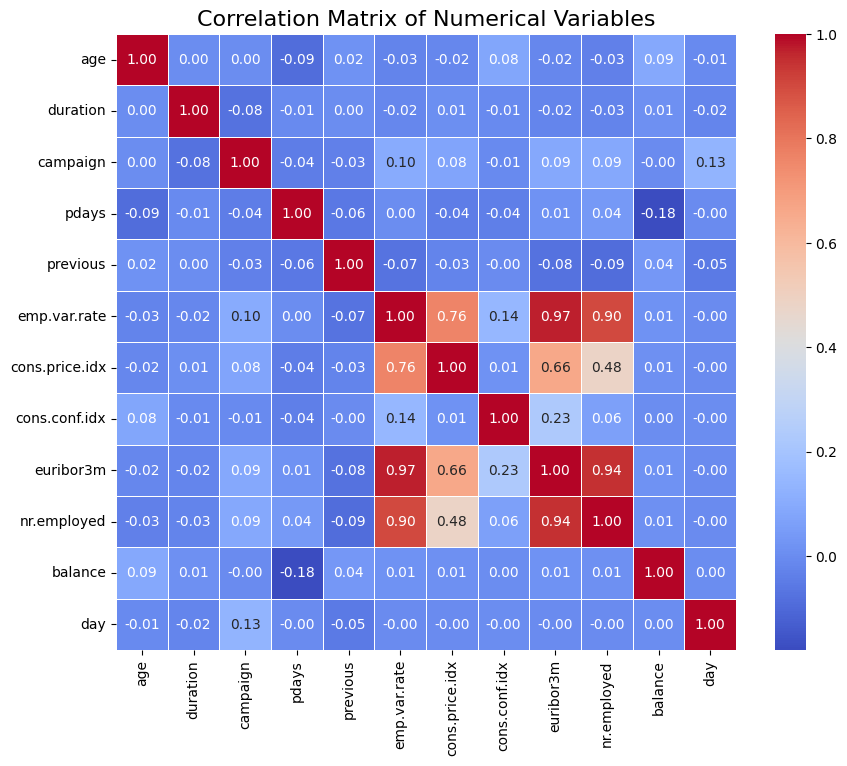

In [40]:
numerical_columns = merged_bank[['age', 'duration', 'campaign', 'pdays', 'previous', 
                                         'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                                         'euribor3m', 'nr.employed', 'balance', 'day']]
correlation_matrix = numerical_columns.corr()

# Set the figure size for better visibility
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()


#### Featuring Enginering 

##### Encoding Categorical Features

In [41]:

#Label Encoding for binary or ordinal categories
merged_bank['housing'] = label_encoder.fit_transform(merged_bank['housing'])
merged_bank['loan'] = label_encoder.fit_transform(merged_bank['loan'])


In [42]:
#One-Hot Encoding for nominal categories like job, marital, and education
merged_bank = pd.get_dummies(merged_bank, columns=['job', 'marital', 'education'], drop_first=True)


####  Feature Transformation

In [43]:
###Age Grouping
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
merged_bank['age_group'] = pd.cut(merged_bank['age'], bins=bins, labels=labels, right=False)
merged_bank['age_group'] = merged_bank['age_group'].fillna(merged_bank['age_group'].mode()[0])



In [44]:
#### Balance Transformation

merged_bank['high_balance'] = merged_bank['balance'].apply(lambda x: 1 if x > 1000 else 0)


### I created a new feature representing whether a customer has a high or low account balance, or if the balance is above a certain threshold

In [45]:
##Interaction Features
merged_bank['age_loan_interaction'] = merged_bank['age'] * merged_bank['loan']


#### Interaction terms between features could be useful in capturing the combined effect of two variables. For example, an interaction between age and loan status may be insightful

In [46]:
merged_bank.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,education_illiterate,education_primary,education_professional.course,education_secondary,education_tertiary,education_university.degree,education_unknown,age_group,high_balance,age_loan_interaction
0,56,no,0,0,telephone,may,mon,261,1,999,...,False,False,False,False,False,False,False,50-60,0,0
2,37,no,1,0,telephone,may,mon,226,1,999,...,False,False,False,False,False,False,False,30-40,0,0
3,40,no,0,0,telephone,may,mon,151,1,999,...,False,False,False,False,False,False,False,40-50,0,0
4,56,no,0,1,telephone,may,mon,307,1,999,...,False,False,False,False,False,False,False,50-60,0,56
6,59,no,0,0,telephone,may,mon,139,1,999,...,False,False,True,False,False,False,False,50-60,0,0


In [47]:
merged_bank.contact.unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [48]:
merged_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84717 entries, 0 to 95038
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            84717 non-null  int64   
 1   default                        84717 non-null  object  
 2   housing                        84717 non-null  int32   
 3   loan                           84717 non-null  int32   
 4   contact                        84717 non-null  object  
 5   month                          84717 non-null  object  
 6   day_of_week                    84717 non-null  object  
 7   duration                       84717 non-null  int64   
 8   campaign                       84717 non-null  int64   
 9   pdays                          84717 non-null  int64   
 10  previous                       84717 non-null  int64   
 11  poutcome                       84717 non-null  object  
 12  emp.var.rate                   84717 

In [49]:
# Apply LabelEncoder to the 'contact' column
merged_bank['contact_encoded'] = label_encoder.fit_transform(merged_bank['contact'])

In [50]:
merged_bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [51]:
merged_bank.head(5)

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,education_primary,education_professional.course,education_secondary,education_tertiary,education_university.degree,education_unknown,age_group,high_balance,age_loan_interaction,contact_encoded
0,56,no,0,0,telephone,may,mon,261,1,999,...,False,False,False,False,False,False,50-60,0,0,1
2,37,no,1,0,telephone,may,mon,226,1,999,...,False,False,False,False,False,False,30-40,0,0,1
3,40,no,0,0,telephone,may,mon,151,1,999,...,False,False,False,False,False,False,40-50,0,0,1
4,56,no,0,1,telephone,may,mon,307,1,999,...,False,False,False,False,False,False,50-60,0,56,1
6,59,no,0,0,telephone,may,mon,139,1,999,...,False,True,False,False,False,False,50-60,0,0,1


In [52]:
#  LabelEncoder to the 'month' column
label_encoder_month = LabelEncoder()
merged_bank['month_encoded'] = label_encoder_month.fit_transform(merged_bank['month'])
# Apply LabelEncoder to the 'day_of_week' column

label_encoder_day = LabelEncoder()
merged_bank['day_of_week_encoded'] = label_encoder_day.fit_transform(merged_bank['day_of_week'])


In [53]:
merged_bank.head(5)

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,education_secondary,education_tertiary,education_university.degree,education_unknown,age_group,high_balance,age_loan_interaction,contact_encoded,month_encoded,day_of_week_encoded
0,56,no,0,0,telephone,may,mon,261,1,999,...,False,False,False,False,50-60,0,0,1,8,1
2,37,no,1,0,telephone,may,mon,226,1,999,...,False,False,False,False,30-40,0,0,1,8,1
3,40,no,0,0,telephone,may,mon,151,1,999,...,False,False,False,False,40-50,0,0,1,8,1
4,56,no,0,1,telephone,may,mon,307,1,999,...,False,False,False,False,50-60,0,56,1,8,1
6,59,no,0,0,telephone,may,mon,139,1,999,...,False,False,False,False,50-60,0,0,1,8,1


In [54]:
merged_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84717 entries, 0 to 95038
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            84717 non-null  int64   
 1   default                        84717 non-null  object  
 2   housing                        84717 non-null  int32   
 3   loan                           84717 non-null  int32   
 4   contact                        84717 non-null  object  
 5   month                          84717 non-null  object  
 6   day_of_week                    84717 non-null  object  
 7   duration                       84717 non-null  int64   
 8   campaign                       84717 non-null  int64   
 9   pdays                          84717 non-null  int64   
 10  previous                       84717 non-null  int64   
 11  poutcome                       84717 non-null  object  
 12  emp.var.rate                   84717 

In [55]:
missing_percentage = merged_bank.isnull().mean() * 100
print(missing_percentage)


age                              0.0
default                          0.0
housing                          0.0
loan                             0.0
contact                          0.0
month                            0.0
day_of_week                      0.0
duration                         0.0
campaign                         0.0
pdays                            0.0
previous                         0.0
poutcome                         0.0
emp.var.rate                     0.0
cons.price.idx                   0.0
cons.conf.idx                    0.0
euribor3m                        0.0
nr.employed                      0.0
y                                0.0
balance                          0.0
day                              0.0
job_blue-collar                  0.0
job_entrepreneur                 0.0
job_housemaid                    0.0
job_management                   0.0
job_retired                      0.0
job_self-employed                0.0
job_services                     0.0
j

In [56]:
columns_to_drop = ['day_of_week', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','contact','month']
merged_bank = merged_bank.drop(columns=columns_to_drop, axis=1)


day_of_week is less likely to influence subscription directly.
Macro-economic variables emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed if focusing on customer-specific behavior.

In [57]:
merged_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84717 entries, 0 to 95038
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            84717 non-null  int64   
 1   default                        84717 non-null  object  
 2   housing                        84717 non-null  int32   
 3   loan                           84717 non-null  int32   
 4   duration                       84717 non-null  int64   
 5   campaign                       84717 non-null  int64   
 6   pdays                          84717 non-null  int64   
 7   previous                       84717 non-null  int64   
 8   poutcome                       84717 non-null  object  
 9   y                              84717 non-null  object  
 10  balance                        84717 non-null  float64 
 11  day                            84717 non-null  float64 
 12  job_blue-collar                84717 

#### Normalizing the data

In [58]:
# Select numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                     'balance', 'day', 'high_balance', 'age_loan_interaction']


# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply normalization to the numerical columns
normalized_data = scaler.fit_transform(merged_bank[numerical_columns])

# Replace the original columns with the normalized ones
merged_bank[numerical_columns] = normalized_data

## Modeling

In [59]:
#checking for missing value
print(merged_bank.isnull().sum())

age                              0
default                          0
housing                          0
loan                             0
duration                         0
campaign                         0
pdays                            0
previous                         0
poutcome                         0
y                                0
balance                          0
day                              0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

In [60]:
# Encode target variable (e.g., 'yes' -> 1, 'no' -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(merged_bank['y'])  # Assuming 'y' is the target column

# Drop the target column from the features
X = merged_bank.drop(columns=['y'])

# One-hot encode categorical variables (e.g., job, marital status)
X = pd.get_dummies(X, drop_first=True)  # Drop first column to avoid multicollinearity


In [61]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
# splitting the data
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


### Logistic Regression

In [63]:

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues

# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [64]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {accuracy}')
recall_score= recall_score(y_test, y_pred)
print(f'Recall_score: {accuracy}')



Accuracy: 0.8947513377400063
Precision: 0.8947513377400063
Recall_score: 0.8947513377400063


In [67]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

F1-Score: 0.42485486992044724


In [68]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     22328
           1       0.63      0.32      0.42      3088

    accuracy                           0.89     25416
   macro avg       0.77      0.65      0.68     25416
weighted avg       0.88      0.89      0.88     25416



In [69]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21753   575]
 [ 2100   988]]


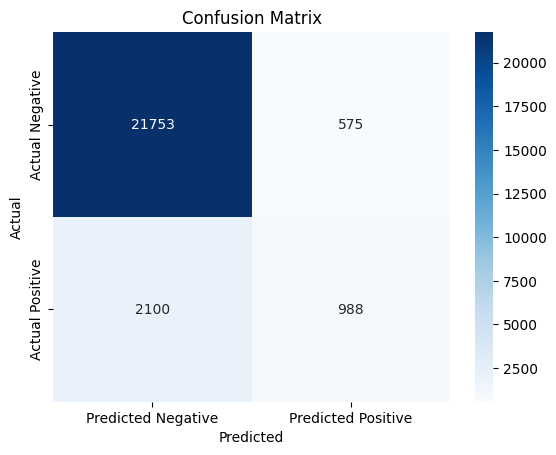

In [70]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest 

In [72]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [75]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf)
print(f'Random Forest Precision: {precision_rf}')



# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Random Forest F1-Score: {f1_rf}')

Random Forest Accuracy: 0.9095058231035568
Random Forest Precision: 0.7014314928425358
Random Forest F1-Score: 0.5440126883425853


In [76]:
# Generate the classification report
report_rf = classification_report(y_test, y_pred_rf)

# Print the classification report
print("Random Forest Classification Report:")
print(report_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     22328
           1       0.70      0.44      0.54      3088

    accuracy                           0.91     25416
   macro avg       0.81      0.71      0.75     25416
weighted avg       0.90      0.91      0.90     25416




#### Since Random forest hard the highest score arruracy is the best model for the prediction 

### saving the model 

In [77]:
import pickle

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)